In [1]:
import numpy as np
import pandas as pd
import os

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "Trackcorona"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
import pandas as pd

COVID_PATH = os.path.join("datasets", "COVID")
H1N1_PATH = os.path.join("datasets", "H1N1")

def load_covid_data(covid_path=COVID_PATH):
    csv_path = os.path.join(covid_path, "COVID.csv")
    return pd.read_csv(csv_path)

def load_h1n1_data(h1n1_path=H1N1_PATH):
    csv_path2 = os.path.join(h1n1_path, "H1N1.csv")
    return pd.read_csv(csv_path2, encoding = "ISO-8859-1")

In [3]:
h1n1 = load_h1n1_data()
h1n1.head()

,Country,Cases,Deaths,Update Time
0,Algeria,5,0.0,7/6/2009 9:00
1,Antigua and Barbuda,2,0.0,7/6/2009 9:00
2,Argentina,2485,60.0,7/6/2009 9:00
3,Australia,5298,10.0,7/6/2009 9:00
4,Austria,19,0.0,7/6/2009 9:00


In [4]:
h1n1.drop('Deaths', axis=1, inplace=True)
h1n1_totals = h1n1.loc[h1n1['Country'].isin(['Total', 'Grand Total'])]

h1n1_totals

,Country,Cases,Update Time
135,Grand Total,94512,7/6/2009 9:00
261,Grand Total,89921,7/3/2009 9:00
382,Grand Total,77201,7/1/2009 9:00
611,Grand Total,59814,6/26/2009 7:00
720,Grand Total,55867,6/24/2009 7:00
820,Grand Total,52160,6/22/2009 7:00
915,Grand Total,44287,6/19/2009 7:00
1004,Grand Total,39620,6/17/2009 12:00
1081,Grand Total,35928,6/15/2009 17:00
1156,Grand Total,29669,6/12/2009 7:00


In [5]:
from datetime import datetime
starting_date_h1n1_temp = list(h1n1_totals['Update Time'].unique())[-1]
starting_date_h1n1 = datetime.strptime(starting_date_h1n1_temp, '%m/%d/%Y %H:%M')

add_day_col = []
for date in list(h1n1_totals['Update Time']):
    temp_date = datetime.strptime(date, '%m/%d/%Y %H:%M')
    add_day_col.append((temp_date-starting_date_h1n1).days + 1)

h1n1_totals.drop('Update Time', axis=1, inplace=True)
h1n1_totals.drop('Country', axis=1, inplace=True)
h1n1_totals.insert(1, "Day", add_day_col, True)


h1n1_totals  # confirmed cases, day

c:\users\souka\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Cases,Day
135,94512,50
261,89921,47
382,77201,45
611,59814,40
720,55867,38
820,52160,36
915,44287,33
1004,39620,31
1081,35928,29
1156,29669,26


In [16]:
covid = load_covid_data()

covid.drop('Province/State', axis=1, inplace=True)
covid.drop('Country/Region', axis=1, inplace=True)
covid.drop('Lat', axis=1, inplace=True)
covid.drop('Long', axis=1, inplace=True)
covid.fillna(0)

covid.head()

,1/21/20 22:00,1/22/20 12:00,1/23/20 12:00,1/24/20 0:00,1/24/20 12:00,1/25/20 0:00,1/25/20 12:00,1/25/20 22:00,1/26/20 11:00,1/26/20 23:00,...,2/4/20 22:00,2/5/20 9:00,2/5/20 23:00,2/6/20 9:00,2/6/20 14:20,2/7/20 20:13,2/7/20 22:50,2/8/20 22:04,2/8/20 23:04,2/9/20 10:30
0,NaN,1.0,9.0,15.0,15.0,39.0,39.0,60.0,60.0,70.0,...,530.0,530.0,591.0,591.0,591.0,665,733,733,779,779
1,10.0,14.0,22.0,26.0,36.0,36.0,41.0,51.0,68.0,68.0,...,228.0,253.0,274.0,274.0,274.0,297,315,315,326,326
2,5.0,6.0,9.0,27.0,27.0,57.0,57.0,75.0,75.0,110.0,...,366.0,376.0,389.0,400.0,400.0,415,426,428,446,450
3,NaN,1.0,5.0,5.0,10.0,10.0,18.0,18.0,35.0,35.0,...,194.0,205.0,215.0,215.0,215.0,224,239,239,250,250
4,NaN,NaN,2.0,2.0,2.0,4.0,4.0,7.0,7.0,14.0,...,57.0,57.0,62.0,62.0,62.0,67,71,79,79,79


In [17]:
dates_covid = list(covid.columns)
starting_date_covid = datetime.strptime(dates_covid[0], '%m/%d/%y %H:%M')

add_day_col_covid = []
add_total_col_covid = []
grand_total = 0
for date in dates_covid:
    temp_date_covid = datetime.strptime(date, '%m/%d/%y %H:%M')
    add_day_col_covid.append((temp_date_covid-starting_date_covid).days + 1)
    grand_total += int(covid[date].sum(skipna = True))
    add_total_col_covid.append(grand_total)
    
    

In [18]:
d = {'Cases':add_total_col_covid,'Day':add_day_col_covid}
covid_totals = pd.DataFrame(data=d)

covid_totals.head()

,Cases,Day
0,330,1
1,885,1
2,1539,2
3,2420,3
4,3361,3


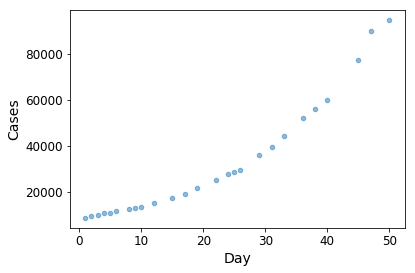

In [21]:
h1n1_totals.plot(kind="scatter", x="Day", y="Cases", alpha=0.5)

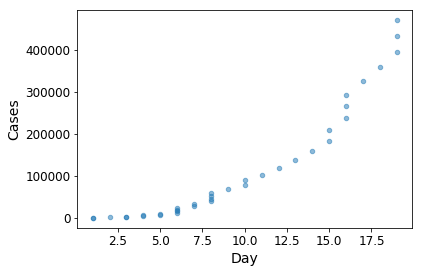

In [20]:
covid_totals.plot(kind="scatter", x="Day", y="Cases", alpha=0.5)

In [25]:
# right now both sets are cleaned to only have Days and Cases (need more columns/variables to base prediction off of)
# import sys
# !{sys.executable} -m pip install lmfit

from lmfit.models import LorentzianModel

model = LorentzianModel()
params = model.guess(h1n1_totals['Cases'], x=h1n1_totals['Day'])
result = model.fit(h1n1_totals['Cases'], params, x=h1n1_totals['Day'])

c:\users\souka\appdata\local\programs\python\python37\lib\site-packages\lmfit\models.py:34: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  return np.abs(arr-val).argmin()


KeyError: 5

In [ ]:
result.plot_fit()
plt.show()

print(result.fit_report())